In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [4]:
train = pd.read_excel(r'C:\Users\ans025\Desktop\Data_Train.xlsx')
test = pd.read_excel(r'C:\Users\ans025\Desktop\Data_Test.xlsx')

In [5]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [7]:
train.shape

(12690, 9)

In [8]:
test.shape

(4231, 8)

In [9]:
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [10]:
train.COST.describe()

count    12690.000000
mean       655.252246
std        627.003540
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64

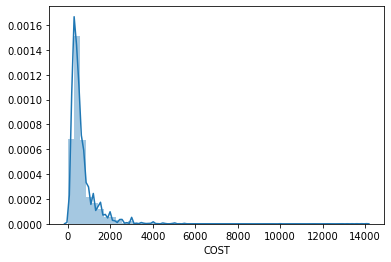

In [11]:
sns.distplot(train['COST'])
plt.show()

In [12]:
train.COST.skew()

3.9788007578247573

In [13]:
print('Kurtosis is %f' % train['COST'].kurt())

Kurtosis is 34.065257


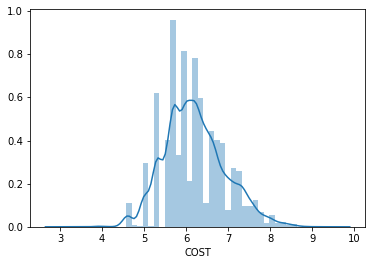

In [14]:
target = np.log(train.COST)
sns.distplot(target)
plt.show()

In [15]:
print("Skew: %f" % target.skew())
print("Kurtosis : %f" % target.kurt())

Skew: 0.392350
Kurtosis : 0.168113


In [16]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

RESTAURANT_ID    int64
COST             int64
dtype: object

In [17]:
corr = numeric_features.corr()

In [18]:
print(corr['COST'].sort_values(ascending = False)[:5] ,'\n')
print(corr['COST'].sort_values(ascending = False)[-5:])

COST             1.00000
RESTAURANT_ID    0.04071
Name: COST, dtype: float64 

COST             1.00000
RESTAURANT_ID    0.04071
Name: COST, dtype: float64


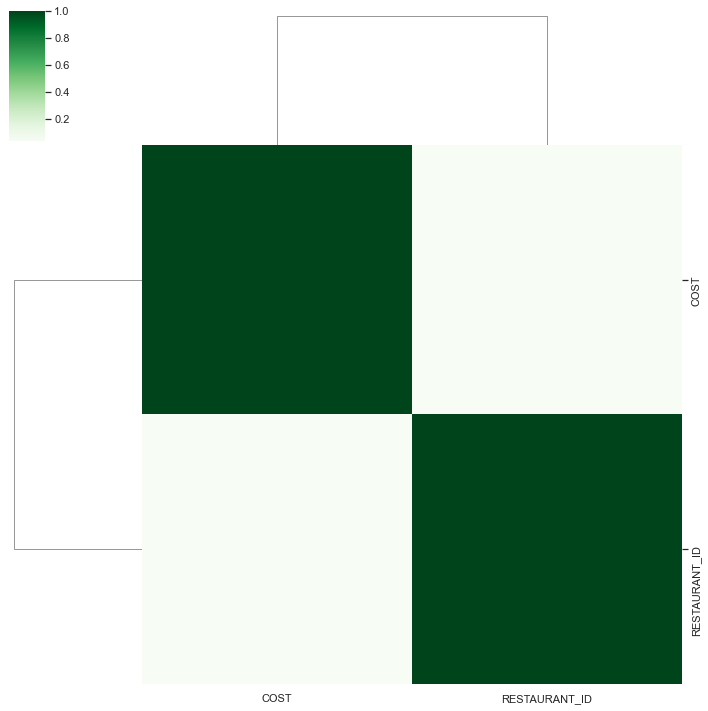

In [19]:
k = 20
cols = corr.nlargest(k, 'COST')['COST'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm, cmap = "Greens", cbar = True, square = True, 
                    yticklabels = cols.values,  xticklabels = cols.values)

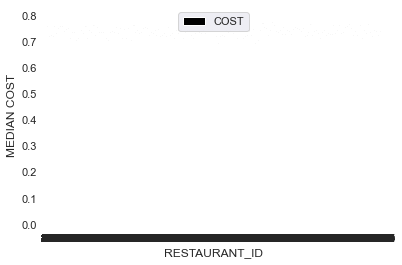

In [75]:
quality = train.pivot_table(index= 'RESTAURANT_ID', values = 'COST', aggfunc=np.median)
quality.plot(kind = 'bar', color ="black")
plt.xlabel('RESTAURANT_ID')
plt.ylabel('MEDIAN COST')
plt.xticks(rotation = 0)
plt.show()

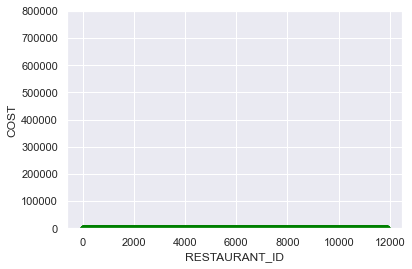

In [76]:
RI = pd.concat([train['COST'], train['RESTAURANT_ID']], axis = 1)
RI.plot.scatter(x ='RESTAURANT_ID', y= 'COST', ylim = (0,800000), c= 'green', alpha = 0.5)

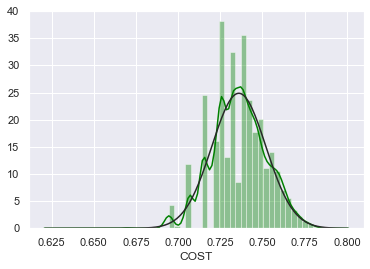

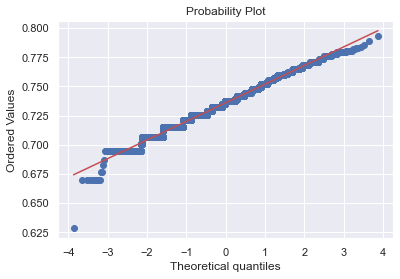

In [77]:
sns.distplot(train['COST'], fit = norm, color = 'Green')
fig= plt.figure()
res = stats.probplot(train['COST'], plot = plt)

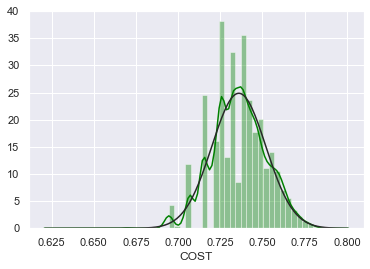

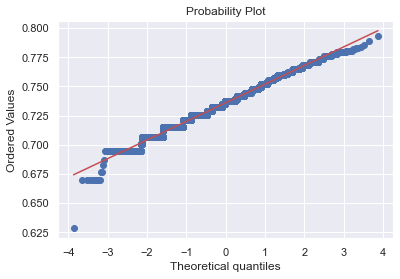

In [72]:
train['COST']= np.log1p(train['COST'])
sns.distplot(train['COST'], fit = norm, color = 'green')
fig = plt.figure()
res = stats.probplot(train['COST'],plot = plt)

In [79]:
total = train.isnull().sum().sort_values(ascending = False)

percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
COST,0,0.0
CUISINES,0,0.0
RESTAURANT_ID,0,0.0
TITLE,0,0.0


In [78]:
categorical_variables = train.select_dtypes(exclude=[np.number])
categorical_variables.describe()

ValueError: Cannot describe a DataFrame without columns

In [80]:
columns = ('TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES')

for i in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(train[i].values)) 
    train[i] = lbl.transform(list(train[i].values))
    lbl.fit(list(test[i].values)) 
    test[i] = lbl.transform(list(test[i].values))

KeyError: 'TIME'

In [81]:
train=train.drop(columns=['CITY', 'LOCALITY', 'VOTES', 'RATING', 'TIME'])
test=test.drop(columns=['CITY', 'LOCALITY', 'VOTES', 'RATING', 'TIME'])

KeyError: "['CITY' 'LOCALITY' 'VOTES' 'RATING' 'TIME'] not found in axis"

In [82]:
train = train.dropna(thresh=0.70*len(train), axis=1)
test = test.dropna(thresh=0.70*len(test), axis=1)

data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [83]:
y = train.COST
X = data.drop(['COST','RESTAURANT_ID'], axis =1)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state =1)

In [85]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


lm = linear_model.LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

submission = pd.DataFrame()
submission['RESTAURANT_ID'] = test.RESTAURANT_ID

feats = test.select_dtypes(
        include=[np.number]).drop(['RESTAURANT_ID'], axis=1).interpolate()

predictions = lm.predict(feats)

lm_predictions = np.exp(predictions)


print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", lm_predictions[:5])

submission['cost'] = lm_predictions
submission.head()

submission.to_csv('Linear Regression.csv', index=False)

The accuracy of the Linear Regression is 0.14231988426445585
RMSE is:  0.00020938816509657096
Original predictions are: 
 [0.74257982 0.73241581 0.74268482 0.73329004 0.73241905] 

Final predictions are: 
 [2.10134963 2.08009966 2.10157028 2.08191895 2.0801064 ]


In [86]:
lambda_values = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.03, 10, 30, 50, 100, 150, 300, 500, 1001]

from sklearn.linear_model import Lasso

def train_lasso(X, Y, alpha):
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso = lasso.fit(X, Y)
    return lasso
lasso_models = []

for alpha in lambda_values:
    l = train_lasso(X_train, y_train, alpha)
    lasso_models.append(l)
    
for i, alpha in enumerate(lambda_values):
    print('Lambda value: ',alpha)
    y_pred_lasso = lasso_models[i].predict(X_test)
    print('The accuracy of the Lasso Regression is',r2_score(y_test,y_pred_lasso))
    print ('RMSE is: ', mean_squared_error(y_test, y_pred_lasso))
    print('\n')
    
    submission = pd.DataFrame()
submission['RESTAURANT_ID'] = test.RESTAURANT_ID


features = test.select_dtypes(
        include=[np.number]).drop(['RESTAURANT_ID'], axis=1).interpolate()

lasso_predictions = lasso_models[1].predict(features)
final_lasso = np.exp(lasso_predictions)

print ("Original predictions are: \n", lasso_predictions[:5], "\n")
print ("Final lasso predictions are: \n", final_lasso[:5])

submission['COST'] = final_lasso
submission.head()

submission.to_csv('lasso.csv', index=False)

Lambda value:  1e-05
The accuracy of the Lasso Regression is 0.14232129261562942
RMSE is:  0.00020938782127133512


Lambda value:  0.0001
The accuracy of the Lasso Regression is 0.1423338249489997
RMSE is:  0.00020938476171306785


Lambda value:  0.001
The accuracy of the Lasso Regression is 0.14245545317987507
RMSE is:  0.00020935506822756004


Lambda value:  0.005
The accuracy of the Lasso Regression is 0.14291473912701358
RMSE is:  0.00020924294129356498


Lambda value:  0.01
The accuracy of the Lasso Regression is 0.14330228785688848
RMSE is:  0.00020914832779379364


Lambda value:  0.03
The accuracy of the Lasso Regression is 0.14277850406147297
RMSE is:  0.0002092762007919164


Lambda value:  10
The accuracy of the Lasso Regression is -0.0003051980867574411
RMSE is:  0.00024420767850531614


Lambda value:  30
The accuracy of the Lasso Regression is -0.0003051980867574411
RMSE is:  0.00024420767850531614


Lambda value:  50
The accuracy of the Lasso Regression is -0.00030519808675

In [87]:
submission['COST'] = final_lasso
submission.head()

,RESTAURANT_ID,COST
0,1085,2.101343
1,3374,2.080104
2,347,2.101564
3,42,2.081923
4,3567,2.080111
